In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import re
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv('train.csv',encoding='latin-1')

In [3]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df[df['Sentiment'] == 0].head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [5]:
df[df['Sentiment'] == 1].head(10)

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


In [6]:
df.shape

(99989, 3)

In [7]:
df['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

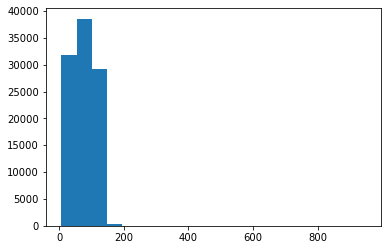

In [8]:
length_df= df['SentimentText'].str.len()
plt.hist(length_df, bins=20)
plt.show()

In [9]:
from nltk.corpus import stopwords

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = " ".join(word for word in text.split() )
    return text

In [11]:
df['Clean_text'] = df['SentimentText'].apply(clean_text)

In [12]:
df.head()

,ItemID,Sentiment,SentimentText,Clean_text
0,1,0,is so sad for my APL frie...,is so sad for my apl friend
1,2,0,I missed the New Moon trail...,i missed the new moon trailer
2,3,1,omg its already 7:30 :O,omg its already 7 30 o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry i ve been at this ...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me t t


In [13]:
tokenized_tweet = df['Clean_text'].apply(lambda x: x.split())

In [14]:
tokenized_tweet.head(10)

0                  [is, so, sad, for, my, apl, friend]
1                 [i, missed, the, new, moon, trailer]
2                        [omg, its, already, 7, 30, o]
3    [omgaga, im, sooo, im, gunna, cry, i, ve, been...
4       [i, think, mi, bf, is, cheating, on, me, t, t]
5                      [or, i, just, worry, too, much]
6                  [juuuuuuuuuuuuuuuuussssst, chillin]
7          [sunny, again, work, tomorrow, tv, tonight]
8    [handed, in, my, uniform, today, i, miss, you,...
9             [hmmmm, i, wonder, how, she, my, number]
Name: Clean_text, dtype: object

In [15]:
from nltk.stem import PorterStemmer

In [16]:
ps = PorterStemmer()

In [17]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['final_tweet'] = tokenized_tweet

In [19]:
df.head()

,ItemID,Sentiment,SentimentText,Clean_text,final_tweet
0,1,0,is so sad for my APL frie...,is so sad for my apl friend,is so sad for my apl friend
1,2,0,I missed the New Moon trail...,i missed the new moon trailer,i miss the new moon trailer
2,3,1,omg its already 7:30 :O,omg its already 7 30 o,omg it alreadi 7 30 o
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry i ve been at this ...,omgaga im sooo im gunna cri i ve been at thi d...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me t t,i think mi bf is cheat on me t t


(-0.5, 799.5, 499.5, -0.5)

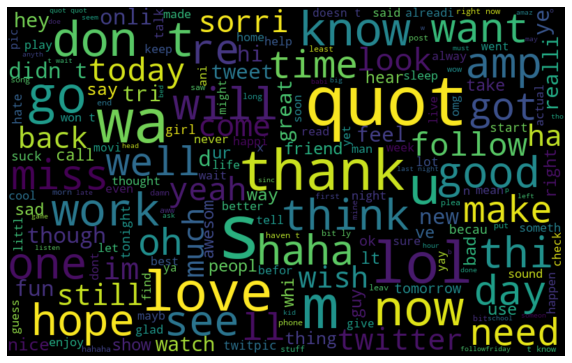

In [20]:
all_words = ' '.join([text for text in df['final_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

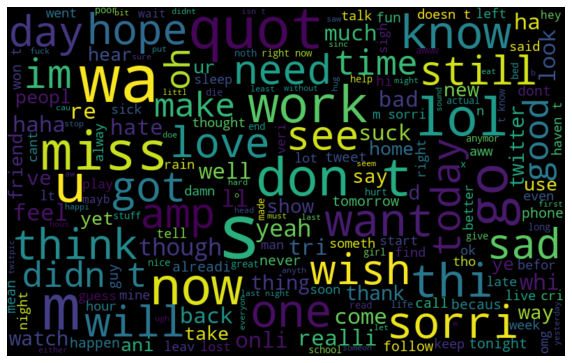

In [21]:
negative_words =' '.join([text for text in df['final_tweet'][df['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

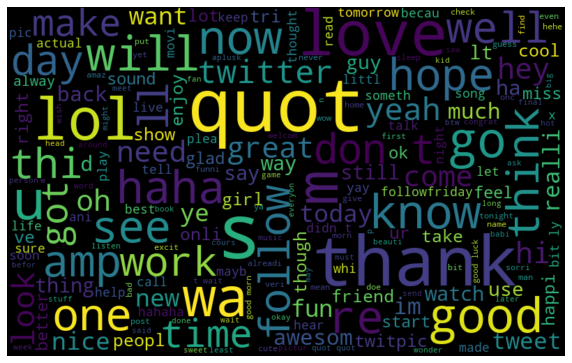

In [22]:
positive_words = ' '.join([text for text in df['final_tweet'][df['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [24]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['final_tweet'])
bow.shape

(99989, 1000)

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['final_tweet'])
tfidf.shape

(99989, 1000)

In [26]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [27]:
wv.most_similar(positive="dinner")

[('dinners', 0.7902063727378845),
 ('brunch', 0.790051281452179),
 ('Dinner', 0.7639397382736206),
 ('supper', 0.7596099972724915),
 ('luncheon', 0.7099571228027344),
 ('banquet', 0.7032414674758911),
 ('breakfast', 0.7007027864456177),
 ('buffet_dinner', 0.6914125680923462),
 ('meal', 0.6843624114990234),
 ('lunch', 0.6815705299377441)]

In [28]:
wv.most_similar(positive="trump")

[('trumps', 0.7198435068130493),
 ('trumping', 0.5805851817131042),
 ('supersede', 0.5600423216819763),
 ('trumped', 0.5497318506240845),
 ('supercede', 0.5309919118881226),
 ('prevail', 0.487763375043869),
 ('outweigh', 0.47853273153305054),
 ('trample', 0.471425324678421),
 ('overshadow', 0.4701153039932251),
 ('dictate', 0.46754559874534607)]

In [29]:
wv['food']

array([-0.18164062,  0.16503906, -0.16601562,  0.35742188, -0.09228516,
        0.20117188, -0.0546875 , -0.26171875, -0.17285156, -0.08056641,
        0.14648438, -0.24609375,  0.18652344,  0.10253906, -0.3203125 ,
        0.16699219, -0.0032196 , -0.06640625,  0.06591797, -0.109375  ,
        0.13964844, -0.05029297,  0.25390625,  0.0859375 ,  0.02026367,
        0.05517578, -0.08447266,  0.07324219,  0.15429688, -0.13867188,
       -0.25195312, -0.15136719,  0.07958984,  0.00848389, -0.24902344,
        0.05224609,  0.04394531, -0.19726562, -0.2109375 ,  0.01477051,
       -0.23632812, -0.14355469,  0.17773438,  0.26757812, -0.08789062,
       -0.07910156, -0.16113281,  0.23632812, -0.07177734,  0.08837891,
        0.07177734, -0.11962891, -0.09228516, -0.12060547, -0.00448608,
       -0.21875   , -0.05712891, -0.04418945,  0.07226562, -0.05883789,
       -0.12597656,  0.03125   , -0.24609375,  0.19140625,  0.14941406,
       -0.19335938, -0.1875    , -0.05126953,  0.03369141, -0.21

In [30]:
wv['food'].shape

(300,)

In [31]:
tokenized_tweet = df['final_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200,
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df['final_tweet']), epochs=20)

(20722410, 28003620)

In [32]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.6807752251625061),
 ('wealth', 0.6058186888694763),
 ('soire', 0.6030454039573669),
 ('davejmatthew', 0.600365936756134),
 ('jbruin', 0.5965646505355835),
 ('extraordinair', 0.5935896635055542),
 ('yellowcard', 0.591633141040802),
 ('chesswhiz', 0.5899069905281067),
 ('authorjjhebert', 0.5837640166282654),
 ('cahpet', 0.578842282295227)]

In [33]:
model_w2v

In [34]:
model_w2v.wv['food']

array([ 0.6826705 , -0.51227844, -0.03511761,  0.08283795, -0.16256274,
       -0.36032534, -0.24471775,  0.10451648,  0.12450326,  0.3475602 ,
        0.57026726,  0.05785184,  0.4487271 , -0.1928202 , -0.1390739 ,
        0.53080845,  0.62739843, -0.28079945, -0.01985389, -0.05443299,
       -0.06679346,  0.18736343, -0.59543806,  0.13565072, -0.2649354 ,
        0.35686108, -0.3956865 , -0.5058347 ,  0.35972008, -0.74258465,
        0.02384947, -0.35422143,  0.08751821, -0.41860905,  0.3187516 ,
       -0.24252494,  0.18509738,  0.19293611,  0.24464506, -0.42241246,
       -0.35179263,  0.4017351 ,  0.0434733 ,  0.15565263, -0.20206112,
        0.22166036, -0.59682065, -0.32899487, -0.784871  ,  0.078454  ,
       -0.21617416,  0.1313536 ,  0.22405112, -0.335549  ,  0.30112126,
       -0.04905888, -0.7322969 , -0.26983786, -0.6904789 , -0.40747318,
       -0.3019487 , -0.19623329,  0.3339603 ,  0.22037983, -0.16348682,
       -0.0566009 ,  0.11706852, -0.00562173,  0.18214412, -0.30

In [35]:
model_w2v.wv['food'].shape

(200,)

In [36]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape  

(99989, 200)

In [38]:
wordvec_arrays[1]

array([-1.15730430e-02, -2.37705960e-01,  2.02744705e-01, -2.14442566e-01,
       -2.79176662e-01, -2.08756406e-01,  7.55373649e-02, -8.68650874e-02,
        1.43726494e-01,  9.80185928e-02, -2.45255254e-01, -4.01240707e-02,
       -3.72566283e-04,  2.46152952e-02, -3.45780143e-01, -5.37990996e-02,
        4.84082758e-02,  1.88933531e-01,  5.24936003e-02,  4.16285638e-02,
       -6.06878464e-01,  2.55771478e-03, -3.09266750e-01,  1.74398657e-01,
       -8.22385146e-02,  2.35604175e-01, -8.74477985e-02, -1.33184351e-01,
       -1.81390491e-02,  8.08417089e-02,  4.24431736e-03, -7.10798064e-02,
       -1.56085004e-01,  1.71016054e-01, -1.35339661e-01, -3.47125703e-01,
       -6.51723745e-02,  9.29158150e-02,  6.45527709e-03,  7.70846475e-02,
       -3.69405494e-01, -1.27903179e-01, -1.21935931e-01,  1.33228524e-01,
        3.85164438e-02, -3.16943542e-02,  1.67408055e-01, -1.65732344e-01,
       -3.09767704e-01,  5.54814227e-02,  2.09063554e-01, -2.65763079e-02,
       -1.02113982e-01, -

# 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [40]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow,df['Sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [41]:
logmodel = LogisticRegression()
logmodel.fit(xtrain_bow, ytrain) # training the model

prediction = logmodel.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) 

0.7786705218382495

In [42]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf,df['Sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [43]:
lmodel_tfidf = LogisticRegression()
lmodel_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = lmodel_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) 

0.7750822252832205

In [44]:
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(wordvec_df,df['Sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [45]:
lmodel_w2v = LogisticRegression()
lmodel_w2v.fit(xtrain_w2v, ytrain)

prediction = lmodel_w2v.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.5 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) 

0.7813051656779048

# 2. Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
mnb_bow = MultinomialNB().fit(xtrain_bow, ytrain)
prediction = mnb_bow.predict(xvalid_bow)
f1_score(yvalid, prediction_int)

0.7813051656779048

In [48]:
mnb_tfidf = MultinomialNB().fit(xtrain_tfidf, ytrain)
prediction = mnb_bow.predict(xvalid_tfidf)
f1_score(yvalid, prediction_int)

0.7813051656779048

# 3. XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.7744135983673013

In [51]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.7660161640055195

# 4. LSTM

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.layers import Embedding

In [53]:
tweet = df.final_tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [54]:
len(padded_sequence)

99989

In [55]:
print(tokenizer.word_index)

{'i': 1, 'you': 2, 'the': 3, 'to': 4, 'it': 5, 'a': 6, 'and': 7, 'that': 8, 'my': 9, 'for': 10, 's': 11, 't': 12, 'is': 13, 'in': 14, 'me': 15, 'have': 16, 'of': 17, 'on': 18, 'quot': 19, 'so': 20, 'but': 21, 'm': 22, 'be': 23, 'wa': 24, 'not': 25, 'just': 26, 'your': 27, 'get': 28, 'go': 29, 'can': 30, 'are': 31, 'good': 32, 'like': 33, 'thank': 34, 'do': 35, 'with': 36, 'love': 37, 'no': 38, 'lol': 39, 'at': 40, 'we': 41, 'u': 42, 'too': 43, 'all': 44, 'up': 45, 'know': 46, 'now': 47, 'thi': 48, 'what': 49, 'day': 50, 'out': 51, 'one': 52, 'will': 53, 'work': 54, 'don': 55, 'there': 56, 'time': 57, 'see': 58, 'if': 59, 'how': 60, 'they': 61, 'think': 62, 'about': 63, 're': 64, 'hope': 65, 'll': 66, 'well': 67, 'amp': 68, 'want': 69, 'miss': 70, 'http': 71, 'he': 72, 'got': 73, 'when': 74, 'im': 75, 'oh': 76, 'as': 77, 'haha': 78, 'from': 79, 'am': 80, 'realli': 81, 'make': 82, 'look': 83, 'had': 84, 'come': 85, 'sorri': 86, 'here': 87, 'back': 88, 'or': 89, 'need': 90, 'some': 91, 's

In [56]:
print(tweet[0])
print(encoded_docs[0])

is so sad for my apl friend
[13, 20, 134, 10, 9, 163]


In [57]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  20 134  10
   9 163]


In [58]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequence, df['Sentiment'], test_size=0.30, random_state=42, stratify=df['Sentiment'])

In [59]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [87]:
model = Sequential([
    Embedding(99989, 200, weights=[wordvec_arrays], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 200)         19997800  
                                                                 
 dropout_8 (Dropout)         (None, None, 200)         0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               168448    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20,199,529
Trainable params: 201,729
Non

In [91]:
history = model.fit(x_train, y_train, epochs=30,batch_size=256, validation_data=(x_test, y_test))

Epoch 1/30
274/274 [==============================] - 337s 1s/step - loss: 0.6460 - accuracy: 0.6206 - val_loss: 0.6200 - val_accuracy: 0.6539
Epoch 2/30
274/274 [==============================] - 321s 1s/step - loss: 0.6194 - accuracy: 0.6531 - val_loss: 0.6055 - val_accuracy: 0.6581
Epoch 3/30
274/274 [==============================] - 319s 1s/step - loss: 0.6045 - accuracy: 0.6656 - val_loss: 0.6023 - val_accuracy: 0.6673
Epoch 4/30
274/274 [==============================] - 319s 1s/step - loss: 0.5916 - accuracy: 0.6785 - val_loss: 0.5785 - val_accuracy: 0.6932
Epoch 5/30
274/274 [==============================] - 320s 1s/step - loss: 0.5797 - accuracy: 0.6892 - val_loss: 0.5620 - val_accuracy: 0.7048
Epoch 6/30
274/274 [==============================] - 322s 1s/step - loss: 0.5716 - accuracy: 0.6971 - val_loss: 0.5559 - val_accuracy: 0.7089
Epoch 7/30
274/274 [==============================] - 317s 1s/step - loss: 0.5645 - accuracy: 0.7036 - val_loss: 0.5528 - val_accuracy: 0.7155

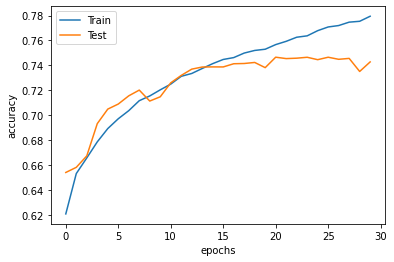

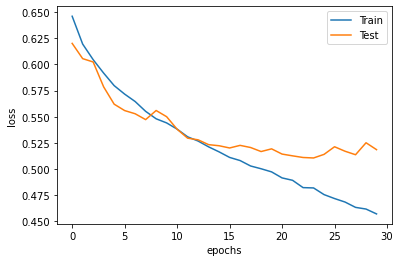

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [93]:
from sklearn.metrics import classification_report

In [94]:
y_pred = model.predict(x_test)

938/938 [==============================] - 75s 79ms/step


In [95]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [96]:
y_pred[0]

array([0.72820204], dtype=float32)

In [117]:
prediction_int = y_pred[:] >= 0.4
prediction_int = prediction_int.astype(np.int)

In [118]:
y_pred[:10]

array([[0.72820204],
       [0.15792032],
       [0.90021074],
       [0.6229855 ],
       [0.61739826],
       [0.27678865],
       [0.17665498],
       [0.9752625 ],
       [0.30949944],
       [0.97913104]], dtype=float32)

In [119]:
prediction_int[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [129]:
prediction_int.shape

(29997, 1)

In [130]:
y_test_arr = y_test.to_numpy()

In [131]:
y_test_arr

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [132]:
y_test_arr.reshape(29997,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [133]:
print(confusion_matrix(y_test_arr,prediction_int))

[[ 8008  5052]
 [ 2674 14263]]


In [137]:
print(classification_report(y_test_arr,prediction_int))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67     13060
           1       0.74      0.84      0.79     16937

    accuracy                           0.74     29997
   macro avg       0.74      0.73      0.73     29997
weighted avg       0.74      0.74      0.74     29997



In [136]:
f1_score(y_test_arr,prediction_int)

0.7868807238221338

# 5) Bidirectional LSTM

In [60]:
model = Sequential()
model.add(Embedding(99989, 200, weights=[wordvec_arrays], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         19997800  
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        135680    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [61]:
history = model.fit(x_train, y_train, epochs=10,batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
274/274 [==============================] - 759s 3s/step - loss: 0.6517 - accuracy: 0.6128 - val_loss: 0.6163 - val_accuracy: 0.6555
Epoch 2/10
274/274 [==============================] - 798s 3s/step - loss: 0.6105 - accuracy: 0.6610 - val_loss: 0.6016 - val_accuracy: 0.6647
Epoch 3/10
274/274 [==============================] - 841s 3s/step - loss: 0.5897 - accuracy: 0.6806 - val_loss: 0.5927 - val_accuracy: 0.6766
Epoch 4/10
274/274 [==============================] - 860s 3s/step - loss: 0.5769 - accuracy: 0.6942 - val_loss: 0.5704 - val_accuracy: 0.6983
Epoch 5/10
274/274 [==============================] - 882s 3s/step - loss: 0.5598 - accuracy: 0.7091 - val_loss: 0.5525 - val_accuracy: 0.7154
Epoch 6/10
274/274 [==============================] - 889s 3s/step - loss: 0.5477 - accuracy: 0.7167 - val_loss: 0.5425 - val_accuracy: 0.7226
Epoch 7/10
274/274 [==============================] - 913s 3s/step - loss: 0.5359 - accuracy: 0.7269 - val_loss: 0.5421 - val_accuracy: 0.7181

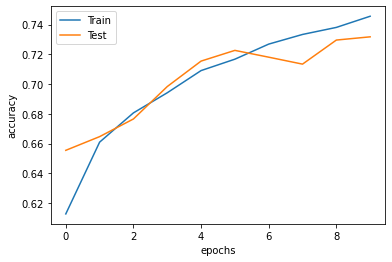

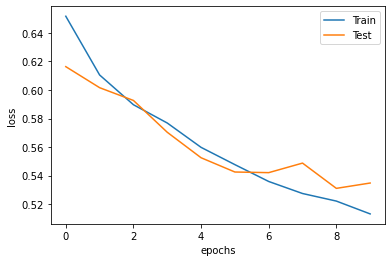

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [63]:
y_pred = model.predict(x_test)

938/938 [==============================] - 86s 90ms/step


In [64]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [65]:
y_pred[0]

array([0.83198696], dtype=float32)

In [66]:
prediction_int = y_pred[:] >= 0.4
prediction_int = prediction_int.astype(np.int)

In [67]:
y_pred[:10]

array([[0.83198696],
       [0.4689183 ],
       [0.8629249 ],
       [0.8320218 ],
       [0.8222757 ],
       [0.50490034],
       [0.24316464],
       [0.8429258 ],
       [0.2986253 ],
       [0.96976864]], dtype=float32)

In [68]:
prediction_int[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [69]:
prediction_int.shape

(29997, 1)

In [70]:
y_test_arr = y_test.to_numpy()

In [71]:
y_test_arr

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [72]:
y_test_arr.reshape(29997,1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [73]:
print(confusion_matrix(y_test_arr,prediction_int))

[[ 5483  7577]
 [ 1194 15743]]


In [74]:
print(classification_report(y_test_arr,prediction_int))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56     13060
           1       0.68      0.93      0.78     16937

    accuracy                           0.71     29997
   macro avg       0.75      0.67      0.67     29997
weighted avg       0.74      0.71      0.68     29997



In [75]:
f1_score(y_test_arr,prediction_int)

0.7821248478525473